Accuracy score:  1.0


/tmp/ipython-input-3702538178.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])
/tmp/ipython-input-3702538178.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])
/tmp/ipython-input-3702538178.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objec

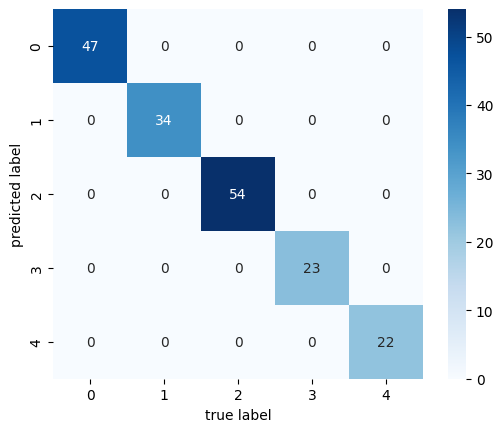

In [5]:
#Mengimport library Pandas
import pandas as pd
pd.set_option("display.max_column", 10)

#Membaca dataset
dataset_credit_scoring = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx')

#Membuat dataset
dataset = dataset_credit_scoring[['pendapatan_setahun_juta', 'kpr_aktif', 'durasi_pinjaman_bulan', 'jumlah_tanggungan', 'rata_rata_overdue', 'risk_rating']]

#Mengubah data kpr_aktif menjadi tipe integer: 'YA' = 1 dan 'TIDAK' = 0
dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])

#Mengubah data rata_rata_overdue menjadi numerik
mapping_dict = {
	"rata_rata_overdue": {
		"46 - 60 days": 60,
		"0 - 30 days": 30,
		"31 - 45 days": 45,
		"61 - 90 days": 90,
		"> 90 days": 91
	}
}
dataset = dataset.replace(mapping_dict)

#Menghapus kolom pendapatan_setahun_juta dan durasi_pinjaman_bulan
dataset = dataset.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan'], axis=1)

#Input variabel X dengan drop kolom risk_rating, karena kolom risk_rating digunakan sebagai lavel (y) (dependen)
X = dataset.drop('risk_rating', axis=1)

#Input variabel y dengan drop kolom label
y = dataset['risk_rating'].astype('category')

#Membagi data training dan data testing
from sklearn.model_selection import train_test_split

#splitting data train 80% test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Import library SVM
from sklearn import svm

#Membuat Objek model_svm
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, y_train)

#Menjalankan data testing
y_predict = model_svm.predict(X_test)

#Menampilkan akurasi model
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, y_predict))

import seaborn as sns
import matplotlib.pyplot as plt

#Melakukan evaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square = True, annot = True, cmap = 'Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()